In [1]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, Sentence, FlairEmbeddings
from typing import List
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from flair.visual.training_curves import Plotter

In [2]:
# 1. get the corpus

# define columns
columns = {0: 'text', 1: 'key_phrase', 2: 'kp_type'}

# this is the folder in which train, test and dev files reside
data_folder = 'corpus_data/'

# init a corpus using column format, data folder and the names of the train, dev and test files
corpus: Corpus = ColumnCorpus(data_folder, columns)

2020-04-26 10:03:19,383 Reading data from corpus_data
2020-04-26 10:03:19,384 Train: corpus_data/train.txt
2020-04-26 10:03:19,385 Dev: corpus_data/dev.txt
2020-04-26 10:03:19,386 Test: corpus_data/test.txt


In [3]:
print(len(corpus.train))
print(len(corpus.dev))
print(len(corpus.test))

1386
367
748


In [4]:
corpus.train[0].to_tagged_string('kp_type')

'The agreement <P> between <P> the <P> new <P> data <P> and <P> the <P> calculations <P> with <P> the <P> relativistic <P> deuteron <P> wave <P> function <P> should not be considered as accidental one ; in this connection other results should be mentioned.'

In [5]:
# 2. what tag do we want to predict?
tag_type = 'kp_type'

In [6]:
# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary)

Dictionary with 7 tags: <unk>, O, P, T, M, <START>, <STOP>


In [7]:
# 4. initialize embeddings
embedding_types: List[TokenEmbeddings] = [

    WordEmbeddings('glove'),

    # comment in this line to use character embeddings
    # CharacterEmbeddings(),

    # comment in these lines to use flair embeddings
    #FlairEmbeddings('news-forward'),
    #FlairEmbeddings('news-backward'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

In [8]:
# 5. initialize sequence tagger
tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

In [9]:
# 6. initialize trainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)

In [10]:
# 7. start training
trainer.train('resources/taggers/kp_type',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=150)

2020-04-26 10:03:51,269 ----------------------------------------------------------------------------------------------------
2020-04-26 10:03:51,270 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=100, out_features=100, bias=True)
  (rnn): LSTM(100, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=7, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2020-04-26 10:03:51,271 ----------------------------------------------------------------------------------------------------
2020-04-26 10:03:51,272 Corpus: "Corpus: 1386 train + 367 dev + 748 test sentences"
2020-04-26 10:03:51,273 ----------------------------------------------------------------------------------------------------
2020-04-26 10:03:51,274 Parameters:
2020-04-26 10:03:51,275  - learning_r

/Users/hn19405/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/hn19405/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


2020-04-26 10:04:08,370 ----------------------------------------------------------------------------------------------------
2020-04-26 10:04:09,804 epoch 2 - iter 4/44 - loss 19.63421440 - samples/sec: 89.37
2020-04-26 10:04:10,967 epoch 2 - iter 8/44 - loss 17.84982717 - samples/sec: 111.67
2020-04-26 10:04:12,257 epoch 2 - iter 12/44 - loss 17.50168029 - samples/sec: 100.60
2020-04-26 10:04:13,576 epoch 2 - iter 16/44 - loss 17.18268293 - samples/sec: 98.32
2020-04-26 10:04:15,132 epoch 2 - iter 20/44 - loss 17.32583261 - samples/sec: 83.13
2020-04-26 10:04:16,263 epoch 2 - iter 24/44 - loss 17.08490682 - samples/sec: 114.92
2020-04-26 10:04:17,298 epoch 2 - iter 28/44 - loss 16.71152830 - samples/sec: 125.69
2020-04-26 10:04:18,626 epoch 2 - iter 32/44 - loss 16.50452808 - samples/sec: 97.65
2020-04-26 10:04:19,840 epoch 2 - iter 36/44 - loss 16.41178102 - samples/sec: 106.90
2020-04-26 10:04:20,949 epoch 2 - iter 40/44 - loss 16.11448135 - samples/sec: 117.21
2020-04-26 10:04:21,9

2020-04-26 10:05:40,724 BAD EPOCHS (no improvement): 3
2020-04-26 10:05:40,726 ----------------------------------------------------------------------------------------------------
2020-04-26 10:05:41,908 epoch 8 - iter 4/44 - loss 13.99594712 - samples/sec: 108.48
2020-04-26 10:05:42,990 epoch 8 - iter 8/44 - loss 14.18910551 - samples/sec: 120.06
2020-04-26 10:05:44,200 epoch 8 - iter 12/44 - loss 13.95990491 - samples/sec: 107.35
2020-04-26 10:05:45,674 epoch 8 - iter 16/44 - loss 14.08727837 - samples/sec: 87.82
2020-04-26 10:05:46,742 epoch 8 - iter 20/44 - loss 13.53181744 - samples/sec: 121.77
2020-04-26 10:05:47,791 epoch 8 - iter 24/44 - loss 13.33390776 - samples/sec: 123.96
2020-04-26 10:05:48,836 epoch 8 - iter 28/44 - loss 13.19170870 - samples/sec: 124.57
2020-04-26 10:05:50,079 epoch 8 - iter 32/44 - loss 13.21827307 - samples/sec: 104.34
2020-04-26 10:05:51,228 epoch 8 - iter 36/44 - loss 13.23340495 - samples/sec: 113.03
2020-04-26 10:05:52,474 epoch 8 - iter 40/44 - lo

2020-04-26 10:07:05,654 EPOCH 13 done: loss 11.9866 - lr 0.0500
2020-04-26 10:07:06,409 DEV : loss 9.88067626953125 - score 0.3314
2020-04-26 10:07:06,425 BAD EPOCHS (no improvement): 1
2020-04-26 10:07:06,426 ----------------------------------------------------------------------------------------------------
2020-04-26 10:07:07,558 epoch 14 - iter 4/44 - loss 11.51081157 - samples/sec: 113.26
2020-04-26 10:07:08,654 epoch 14 - iter 8/44 - loss 11.30199385 - samples/sec: 118.61
2020-04-26 10:07:09,816 epoch 14 - iter 12/44 - loss 11.38690662 - samples/sec: 111.72
2020-04-26 10:07:11,072 epoch 14 - iter 16/44 - loss 11.57905656 - samples/sec: 103.28
2020-04-26 10:07:12,194 epoch 14 - iter 20/44 - loss 11.65583162 - samples/sec: 115.87
2020-04-26 10:07:13,268 epoch 14 - iter 24/44 - loss 11.53364762 - samples/sec: 121.16
2020-04-26 10:07:14,702 epoch 14 - iter 28/44 - loss 11.77569226 - samples/sec: 90.23
2020-04-26 10:07:15,945 epoch 14 - iter 32/44 - loss 11.82348877 - samples/sec: 104

2020-04-26 10:08:33,461 ----------------------------------------------------------------------------------------------------
2020-04-26 10:08:33,461 EPOCH 19 done: loss 11.8462 - lr 0.0500
2020-04-26 10:08:34,215 DEV : loss 9.86258316040039 - score 0.2231
2020-04-26 10:08:34,232 BAD EPOCHS (no improvement): 1
2020-04-26 10:08:34,233 ----------------------------------------------------------------------------------------------------
2020-04-26 10:08:35,201 epoch 20 - iter 4/44 - loss 11.04836512 - samples/sec: 132.38
2020-04-26 10:08:36,473 epoch 20 - iter 8/44 - loss 11.09355819 - samples/sec: 101.95
2020-04-26 10:08:37,670 epoch 20 - iter 12/44 - loss 11.28293141 - samples/sec: 108.49
2020-04-26 10:08:39,112 epoch 20 - iter 16/44 - loss 11.66990942 - samples/sec: 89.77
2020-04-26 10:08:40,367 epoch 20 - iter 20/44 - loss 11.65033736 - samples/sec: 103.62
2020-04-26 10:08:41,497 epoch 20 - iter 24/44 - loss 11.65135356 - samples/sec: 114.98
2020-04-26 10:08:42,631 epoch 20 - iter 28/44

2020-04-26 10:09:56,239 epoch 25 - iter 40/44 - loss 11.29119892 - samples/sec: 105.46
2020-04-26 10:09:57,382 epoch 25 - iter 44/44 - loss 11.39788016 - samples/sec: 113.68
2020-04-26 10:09:57,398 ----------------------------------------------------------------------------------------------------
2020-04-26 10:09:57,399 EPOCH 25 done: loss 11.3979 - lr 0.0250
2020-04-26 10:09:58,152 DEV : loss 9.197665214538574 - score 0.3906
2020-04-26 10:09:58,168 BAD EPOCHS (no improvement): 3
2020-04-26 10:09:58,169 ----------------------------------------------------------------------------------------------------
2020-04-26 10:09:59,391 epoch 26 - iter 4/44 - loss 11.44508982 - samples/sec: 104.89
2020-04-26 10:10:00,513 epoch 26 - iter 8/44 - loss 11.26672804 - samples/sec: 115.73
2020-04-26 10:10:01,893 epoch 26 - iter 12/44 - loss 11.47325444 - samples/sec: 93.89
2020-04-26 10:10:03,077 epoch 26 - iter 16/44 - loss 11.33589548 - samples/sec: 109.76
2020-04-26 10:10:04,177 epoch 26 - iter 20/4

2020-04-26 10:11:16,624 epoch 31 - iter 28/44 - loss 11.11087346 - samples/sec: 99.49
2020-04-26 10:11:17,714 epoch 31 - iter 32/44 - loss 11.03091261 - samples/sec: 119.28
2020-04-26 10:11:18,752 epoch 31 - iter 36/44 - loss 11.08119135 - samples/sec: 125.39
2020-04-26 10:11:19,908 epoch 31 - iter 40/44 - loss 11.19114542 - samples/sec: 112.37
2020-04-26 10:11:21,272 epoch 31 - iter 44/44 - loss 11.37731032 - samples/sec: 94.99
2020-04-26 10:11:21,289 ----------------------------------------------------------------------------------------------------
2020-04-26 10:11:21,290 EPOCH 31 done: loss 11.3773 - lr 0.0063
2020-04-26 10:11:22,046 DEV : loss 9.226430892944336 - score 0.347
2020-04-26 10:11:22,062 BAD EPOCHS (no improvement): 1
2020-04-26 10:11:22,064 ----------------------------------------------------------------------------------------------------
2020-04-26 10:11:23,131 epoch 32 - iter 4/44 - loss 11.93174481 - samples/sec: 120.04
2020-04-26 10:11:24,350 epoch 32 - iter 8/44 

2020-04-26 10:12:37,888 epoch 37 - iter 20/44 - loss 11.44679518 - samples/sec: 108.05
2020-04-26 10:12:39,013 epoch 37 - iter 24/44 - loss 11.38365312 - samples/sec: 115.44
2020-04-26 10:12:40,221 epoch 37 - iter 28/44 - loss 11.32168330 - samples/sec: 107.54
2020-04-26 10:12:41,560 epoch 37 - iter 32/44 - loss 11.34688908 - samples/sec: 96.76
2020-04-26 10:12:42,766 epoch 37 - iter 36/44 - loss 11.32446583 - samples/sec: 107.63
2020-04-26 10:12:43,959 epoch 37 - iter 40/44 - loss 11.16083856 - samples/sec: 108.73
2020-04-26 10:12:45,031 epoch 37 - iter 44/44 - loss 11.23075700 - samples/sec: 121.23
2020-04-26 10:12:45,048 ----------------------------------------------------------------------------------------------------
2020-04-26 10:12:45,049 EPOCH 37 done: loss 11.2308 - lr 0.0031
2020-04-26 10:12:46,138 DEV : loss 9.142257690429688 - score 0.3791
2020-04-26 10:12:46,155 BAD EPOCHS (no improvement): 3
2020-04-26 10:12:46,156 --------------------------------------------------------

2020-04-26 10:13:59,147 epoch 43 - iter 8/44 - loss 10.96710300 - samples/sec: 102.17
2020-04-26 10:14:00,355 epoch 43 - iter 12/44 - loss 11.33577426 - samples/sec: 107.52
2020-04-26 10:14:01,532 epoch 43 - iter 16/44 - loss 11.21236187 - samples/sec: 110.23
2020-04-26 10:14:02,675 epoch 43 - iter 20/44 - loss 11.36123042 - samples/sec: 113.67
2020-04-26 10:14:03,714 epoch 43 - iter 24/44 - loss 11.30248161 - samples/sec: 125.13
2020-04-26 10:14:04,733 epoch 43 - iter 28/44 - loss 11.08008443 - samples/sec: 127.84
2020-04-26 10:14:05,929 epoch 43 - iter 32/44 - loss 11.06875896 - samples/sec: 108.49
2020-04-26 10:14:07,251 epoch 43 - iter 36/44 - loss 11.03298169 - samples/sec: 98.05
2020-04-26 10:14:08,567 epoch 43 - iter 40/44 - loss 11.04665375 - samples/sec: 98.54
2020-04-26 10:14:09,640 epoch 43 - iter 44/44 - loss 11.00578629 - samples/sec: 121.21
2020-04-26 10:14:09,656 ----------------------------------------------------------------------------------------------------
2020-04-

2020-04-26 10:15:21,420 epoch 49 - iter 4/44 - loss 11.43570566 - samples/sec: 123.37
2020-04-26 10:15:22,697 epoch 49 - iter 8/44 - loss 11.75285900 - samples/sec: 101.56
2020-04-26 10:15:23,892 epoch 49 - iter 12/44 - loss 11.43454560 - samples/sec: 108.62
2020-04-26 10:15:24,982 epoch 49 - iter 16/44 - loss 11.36705458 - samples/sec: 119.24
2020-04-26 10:15:26,184 epoch 49 - iter 20/44 - loss 11.20359087 - samples/sec: 107.99
2020-04-26 10:15:27,693 epoch 49 - iter 24/44 - loss 11.33529123 - samples/sec: 85.80
2020-04-26 10:15:28,847 epoch 49 - iter 28/44 - loss 11.20258192 - samples/sec: 112.53
2020-04-26 10:15:30,034 epoch 49 - iter 32/44 - loss 11.12910402 - samples/sec: 109.47
2020-04-26 10:15:31,386 epoch 49 - iter 36/44 - loss 11.13309852 - samples/sec: 95.82
2020-04-26 10:15:32,630 epoch 49 - iter 40/44 - loss 11.22511334 - samples/sec: 104.32
2020-04-26 10:15:33,569 epoch 49 - iter 44/44 - loss 11.11020838 - samples/sec: 138.72
2020-04-26 10:15:33,585 -----------------------

Epoch    53: reducing learning rate of group 0 to 9.7656e-05.
2020-04-26 10:16:44,885 BAD EPOCHS (no improvement): 4
2020-04-26 10:16:44,886 ----------------------------------------------------------------------------------------------------
2020-04-26 10:16:44,887 ----------------------------------------------------------------------------------------------------
2020-04-26 10:16:44,888 learning rate too small - quitting training!
2020-04-26 10:16:44,888 ----------------------------------------------------------------------------------------------------
2020-04-26 10:16:47,161 ----------------------------------------------------------------------------------------------------
2020-04-26 10:16:47,162 Testing using best model ...
2020-04-26 10:16:47,162 loading file resources/taggers/kp_type/best-model.pt
2020-04-26 10:16:50,003 0.3684	0.3653	0.3668
2020-04-26 10:16:50,004 
MICRO_AVG: acc 0.2246 - f1-score 0.3668
MACRO_AVG: acc 0.1726 - f1-score 0.27486666666666665
M          tp: 789 - 

{'test_score': 0.3668,
 'dev_score_history': [0.0319,
  0.2004,
  0.2358,
  0.3391,
  0.278,
  0.276,
  0.1206,
  0.2036,
  0.3204,
  0.3047,
  0.3174,
  0.3672,
  0.3314,
  0.3833,
  0.302,
  0.3756,
  0.3141,
  0.4084,
  0.2231,
  0.3617,
  0.3456,
  0.3764,
  0.3647,
  0.3584,
  0.3906,
  0.3874,
  0.3361,
  0.3486,
  0.3282,
  0.3536,
  0.347,
  0.3825,
  0.3424,
  0.3912,
  0.3741,
  0.3674,
  0.3791,
  0.3772,
  0.3749,
  0.3761,
  0.379,
  0.3776,
  0.3794,
  0.3747,
  0.3704,
  0.376,
  0.3719,
  0.3732,
  0.3732,
  0.3711,
  0.3725,
  0.3736,
  0.372,
  0.3722],
 'train_loss_history': [22.12130149928006,
  15.826025009155273,
  14.473064097491177,
  13.967467459765347,
  13.800914439288052,
  13.52294187112288,
  13.378278840671886,
  13.268467231230302,
  12.262693968686191,
  12.111864458430897,
  11.961831331253052,
  12.053469809618862,
  11.986562707207419,
  12.060424609617753,
  11.926645864139903,
  12.074386444958774,
  11.739525925029408,
  11.69095288623463,
  11.84

Weights plots are saved in resources/taggers/kp_type/weights.png


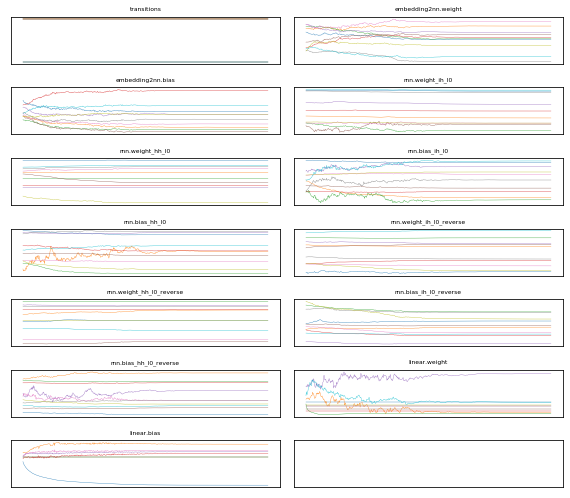

In [11]:
# 8. plot weight traces (optional)
plotter = Plotter()
plotter.plot_weights('resources/taggers/kp_type/weights.txt')